In [1]:
import os
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil


In [6]:
# Path to your dataset
dataset_path = '/Users/akash/Desktop/MRI DATASET PREDICTION/DATASET IMAGES'
temp_path = '/Users/akash/Desktop/MRI DATASET PREDICTION/DATASET IMAGES/Image_Dataset_split'

# Ensure temporary directory for splitting exists
if not os.path.exists(temp_path):
    os.makedirs(temp_path)

In [21]:
# Define image size
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
EPOCHS = 10

In [8]:
# Prepare categories
categories = ["heart_failure_with_infarct", "heart_failure_without_infarct", "hypertrophy", "normal"]

# Split dataset into train and test
train_dir = os.path.join(temp_path, 'train')
test_dir = os.path.join(temp_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    os.makedirs(test_dir)

    for category in categories:
        os.makedirs(os.path.join(train_dir, category))
        os.makedirs(os.path.join(test_dir, category))

        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)

        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))


In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [13]:
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], 
                       weights='/Users/akash/Desktop/MRI DATASET PREDICTION/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                       include_top=False)


In [14]:
# Freeze layers
for layer in densenet.layers:
    layer.trainable = False


In [15]:
# Adding custom layers for classification
x = Flatten()(densenet.output)
prediction = Dense(len(categories), activation='softmax')(x)


In [22]:
# Model creation
model = Model(inputs=densenet.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_7… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,238,212 (27.61 MB)

 Trainable params: 200,708 (784.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [23]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 17253 images belonging to 4 classes.
Found 4316 images belonging to 4 classes.


In [24]:
# Model training
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=EPOCHS,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.9255 - loss: 0.4687 - val_accuracy: 0.8892 - val_loss: 0.7709
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.9676 - loss: 0.1696 - val_accuracy: 0.9924 - val_loss: 0.0412
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 990s 2s/step - accuracy: 0.9698 - loss: 0.1821 - val_accuracy: 0.9926 - val_loss: 0.0455
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.9748 - loss: 0.1517 - val_accuracy: 0.9935 - val_loss: 0.0367
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.9772 - loss: 0.1665 - val_accuracy: 0.9859 - val_loss: 0.1119
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 938s 2s/step - accuracy: 0.9814 - loss: 0.1425 - val_accuracy: 0.9766 - val_loss: 0.2532
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 960s 2s/step - accuracy: 0.9819 - loss: 0.1495 - val_accuracy: 0.9958 - val_loss: 0.0259
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 923s 2s/step - accuracy: 0.9810 - loss: 0.1463 - val_accu

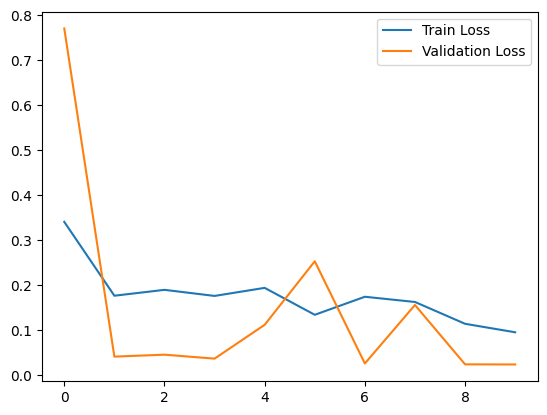

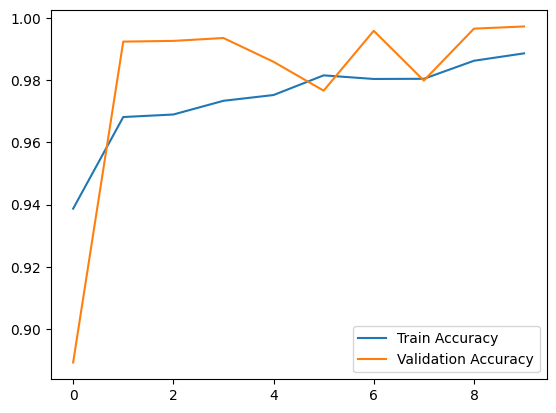

<Figure size 640x480 with 0 Axes>

In [25]:
# Plotting Loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('DenseNet_Loss_Val_loss.png')

# Plotting Accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('DenseNet_Acc_Val_acc.png')


In [26]:
# Saving the model
model.save('heart_disease_mri_densenet_model.h5')


In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9962 - loss: 0.0215
Test Loss: 0.02367759682238102
Test Accuracy: 0.9972196221351624


In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the saved model
model_path = '/Users/akash/Desktop/MRI DATASET PREDICTION/heart_disease_mri_densenet_model.h5'

# Load the trained model
model = load_model(model_path)

# Path to the new MRI image
new_image_path = '/Users/akash/Desktop/MRI DATASET PREDICTION/DATASET IMAGES/normal/image_015.png'

# Preprocess the new image
def preprocess_image(image_path, target_size):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Expand dimensions to match the input format of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (rescale as done in training)
    img_array = img_array / 255.0
    return img_array

# Preprocess the new image
new_image = preprocess_image(new_image_path, target_size=(224, 224))

# Make predictions
predictions = model.predict(new_image)

# Decode the prediction
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class = categories[predicted_class_index]

# Display the result
print(f"The predicted condition is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted condition is: normal
